In [2]:
from sklearn import tree
import pandas as pd
import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import arange
import numpy as np     
%matplotlib inline

In [8]:
taxi = sns.load_dataset("taxis")

In [9]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [10]:
taxi

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


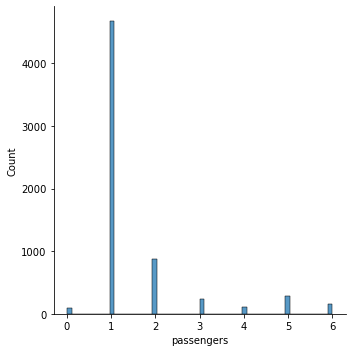

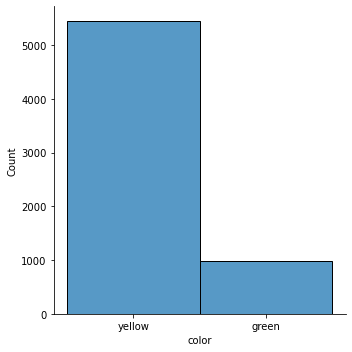

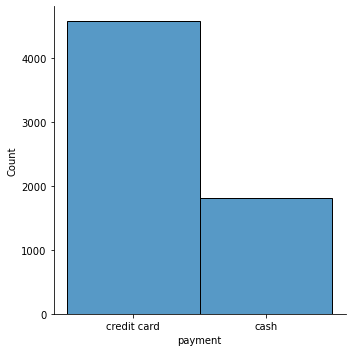

In [12]:
sns.displot(data=taxi, x="passengers")
sns.displot(data=taxi, x="color")
sns.displot(data=taxi, x="payment")

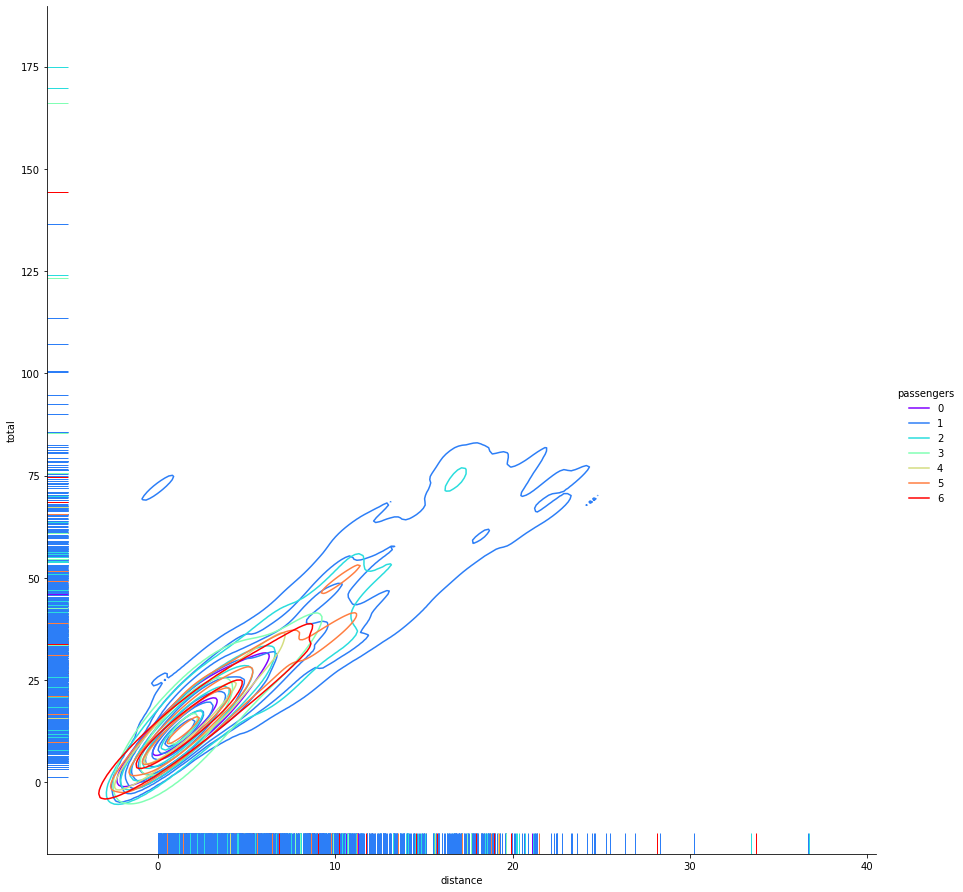

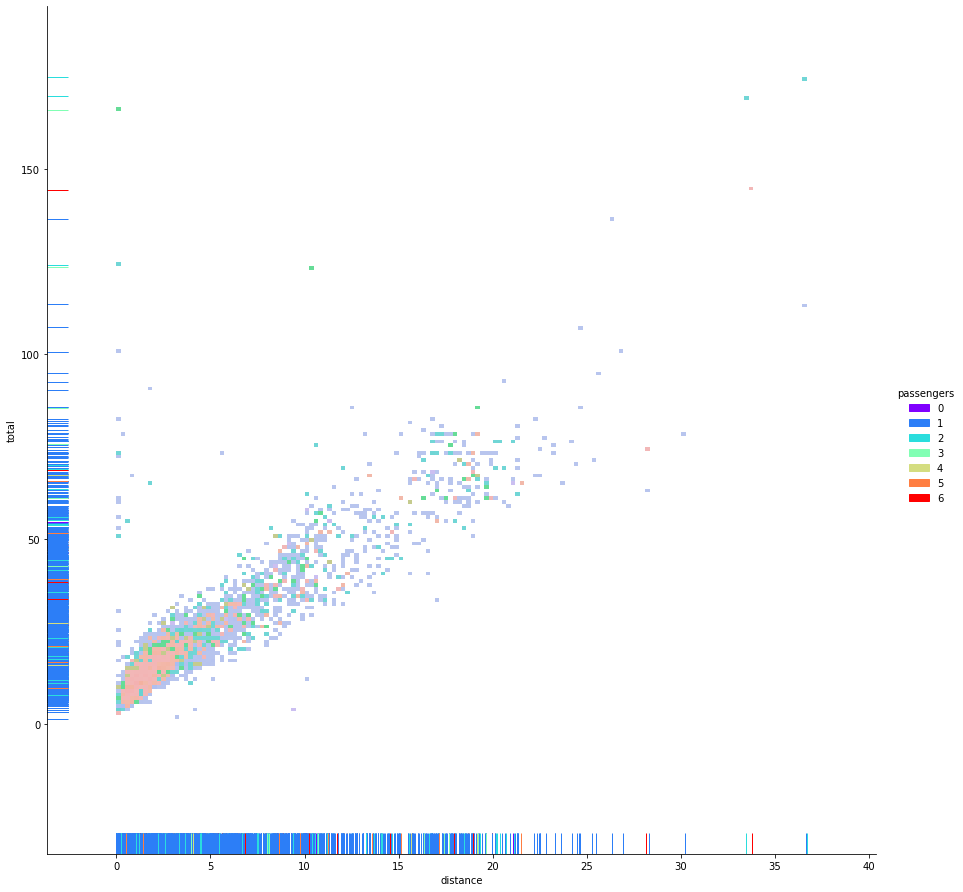

In [27]:
sns.displot(data=taxi, x="distance", y="total", hue="passengers",kind="kde",height=12.5, rug=True,palette="rainbow")
sns.displot(data=taxi, x="distance", y="total", hue="passengers",height=12.5, rug=True,palette="rainbow")




In [28]:
taxi.describe

<bound method NDFrame.describe of                    pickup              dropoff  passengers  distance  fare  \
0     2019-03-23 20:21:09  2019-03-23 20:27:24           1      1.60   7.0   
1     2019-03-04 16:11:55  2019-03-04 16:19:00           1      0.79   5.0   
2     2019-03-27 17:53:01  2019-03-27 18:00:25           1      1.37   7.5   
3     2019-03-10 01:23:59  2019-03-10 01:49:51           1      7.70  27.0   
4     2019-03-30 13:27:42  2019-03-30 13:37:14           3      2.16   9.0   
...                   ...                  ...         ...       ...   ...   
6428  2019-03-31 09:51:53  2019-03-31 09:55:27           1      0.75   4.5   
6429  2019-03-31 17:38:00  2019-03-31 18:34:23           1     18.74  58.0   
6430  2019-03-23 22:55:18  2019-03-23 23:14:25           1      4.14  16.0   
6431  2019-03-04 10:09:25  2019-03-04 10:14:29           1      1.12   6.0   
6432  2019-03-13 19:31:22  2019-03-13 19:48:02           1      3.85  15.0   

       tip  tolls  total   co

In [36]:
taxi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [33]:
taxi["pickup"] = pd.to_datetime(taxi["pickup"], errors="coerce")

In [35]:
taxi["dropoff"] = pd.to_datetime(taxi["dropoff"], errors="coerce")

In [37]:
taxi.head(10)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
5,2019-03-11 10:37:23,2019-03-11 10:47:31,1,0.49,7.5,2.16,0.0,12.96,yellow,credit card,Times Sq/Theatre District,Midtown East,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
7,2019-03-22 12:47:13,2019-03-22 12:58:17,0,1.40,8.5,0.00,0.0,11.80,yellow,NaN,Murray Hill,Flatiron,Manhattan,Manhattan
8,2019-03-23 11:48:50,2019-03-23 12:06:14,1,3.63,15.0,1.00,0.0,19.30,yellow,credit card,East Harlem South,Midtown Center,Manhattan,Manhattan
9,2019-03-08 16:18:37,2019-03-08 16:26:57,1,1.52,8.0,1.00,0.0,13.30,yellow,credit card,Lincoln Square East,Central Park,Manhattan,Manhattan


In [50]:
night = taxi.loc[taxi["pickup"].dt.hour.between(0, 5)]
morning = taxi.loc[taxi["pickup"].dt.hour.between(5, 10)]
day = taxi.loc[taxi["pickup"].dt.hour.between(10, 19)]
evening = taxi.loc[taxi["pickup"].dt.hour.between(19, 24)]

In [47]:
night

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.00,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
20,2019-03-21 03:37:34,2019-03-21 03:44:13,1,1.07,6.5,1.54,0.00,11.84,yellow,credit card,Penn Station/Madison Sq West,Kips Bay,Manhattan,Manhattan
26,2019-03-03 02:45:36,2019-03-03 03:02:14,1,3.35,13.5,0.00,0.00,17.30,yellow,cash,West Chelsea/Hudson Yards,Seaport,Manhattan,Manhattan
31,2019-03-01 02:55:55,2019-03-01 02:57:59,3,0.74,4.0,0.00,0.00,7.80,yellow,cash,Clinton East,West Chelsea/Hudson Yards,Manhattan,Manhattan
54,2019-03-24 01:13:51,2019-03-24 01:24:00,1,2.80,10.5,2.85,0.00,17.15,yellow,credit card,East Village,Sutton Place/Turtle Bay North,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362,2019-03-08 03:34:43,2019-03-08 04:20:37,1,21.37,62.5,0.00,5.76,69.56,green,credit card,Coney Island,Clinton West,Brooklyn,Manhattan
6366,2019-03-02 01:06:48,2019-03-02 01:28:04,1,3.50,15.5,2.00,0.00,21.55,green,credit card,Williamsburg (North Side),East Village,Brooklyn,Manhattan
6379,2019-03-28 02:03:25,2019-03-28 02:14:40,2,1.80,9.5,2.16,0.00,12.96,green,credit card,Jackson Heights,Sunnyside,Queens,Queens
6397,2019-03-07 02:09:19,2019-03-07 02:15:40,1,1.57,7.5,0.00,0.00,8.80,green,cash,Fort Greene,Bedford,Brooklyn,Brooklyn


In [51]:
evening

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
6,2019-03-26 21:07:31,2019-03-26 21:17:29,1,3.65,13.0,2.00,0.0,18.80,yellow,credit card,Battery Park City,Two Bridges/Seward Park,Manhattan,Manhattan
11,2019-03-20 19:39:42,2019-03-20 19:45:36,1,1.53,6.5,2.16,0.0,12.96,yellow,credit card,Upper West Side South,Manhattan Valley,Manhattan,Manhattan
12,2019-03-18 21:27:14,2019-03-18 21:34:16,1,1.05,6.5,1.00,0.0,11.30,yellow,credit card,Murray Hill,Midtown Center,Manhattan,Manhattan
17,2019-03-23 20:50:49,2019-03-23 21:02:07,1,2.60,10.5,2.00,0.0,16.30,yellow,credit card,Midtown Center,East Harlem South,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6418,2019-03-02 21:47:50,2019-03-02 21:55:34,1,1.48,7.5,1.76,0.0,10.56,green,credit card,Forest Hills,Kew Gardens Hills,Queens,Queens
6422,2019-03-22 20:17:35,2019-03-22 20:36:07,1,4.02,16.0,0.00,0.0,17.30,green,cash,Washington Heights South,Spuyten Duyvil/Kingsbridge,Manhattan,Bronx
6424,2019-03-30 20:52:15,2019-03-30 20:59:55,1,1.70,8.0,0.00,0.0,9.30,green,cash,Central Harlem,Central Harlem North,Manhattan,Manhattan
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn


In [56]:
morning_count = morning.pickup.count()
day_count = day.pickup.count()
evening_count = evening.pickup.count()
night_count = night.pickup.count()

In [57]:
morning_count

1371

In [58]:
day_count

3507

In [59]:
evening_count

1746

In [60]:
night_count

591

In [61]:
taxi.tolls.nunique()

16

In [68]:
taxi.tolls.unique()

array([ 0.  ,  5.76, 12.5 ,  5.54,  8.4 , 17.28,  6.12,  2.64, 16.26,
        9.5 , 11.52,  5.75, 24.02,  8.5 , 18.9 ,  4.75])

In [71]:
taxi[taxi.payment == "cash"].tip.unique()

array([0.])

In [72]:
taxi[taxi.payment == "cash"].tolls.unique()

array([ 0.  ,  5.76,  8.4 , 12.5 ,  6.12, 24.02, 18.9 ,  4.75])

In [73]:
taxi[taxi.payment == "credit card"].tolls.unique()

array([ 0.  ,  5.76, 12.5 ,  5.54, 17.28,  6.12,  2.64, 16.26,  9.5 ,
       11.52,  5.75,  8.5 ])

In [77]:
taxi.groupby("payment").all

<bound method GroupBy.all of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x7fa121f0e4c0>>